### Day 4 Exercise

# Predicting ESP Temperatures - Using Linear Regression

<img src = "images/logo.jpg", width="100" align="left">

Ram Narasimhan

# <div class="alert alert-block alert-success"> Exercises    </div>


Use Wells_TDH_ESP6.csv (data/ESP Data)
Each row is one well…
Read it as a data frame…

Can you model TDH, as a regression function of other (continuous) variables?

Print your model summary

What is the adjusted R^2?
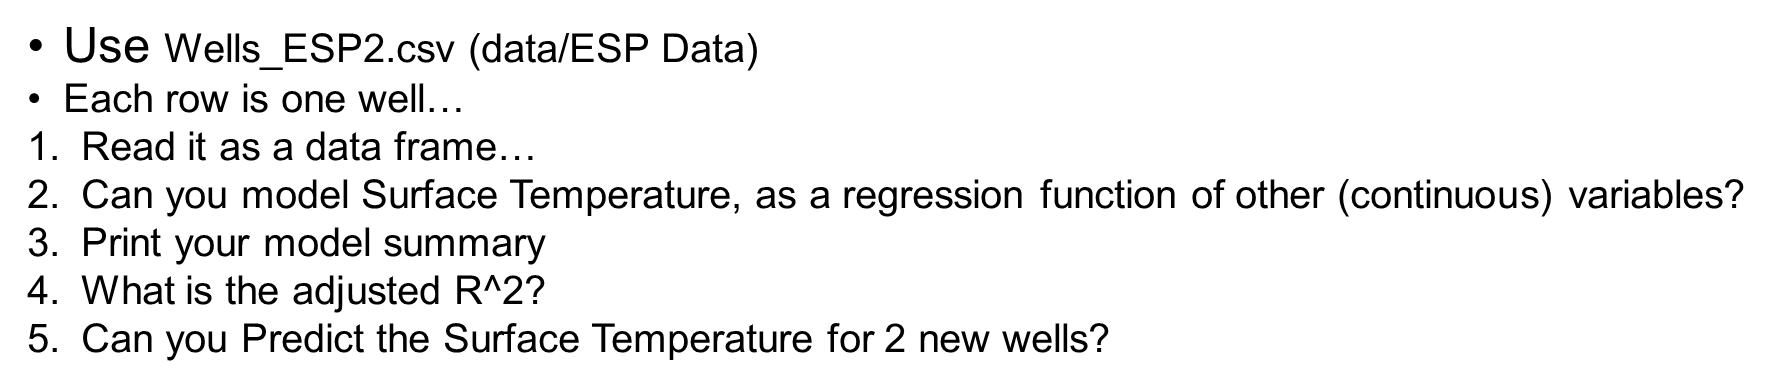

### 1 Read the file containing TDH and other variables for 1000 wells.
### 2 Drop the column called "Unnamed :0" and make the "Wells" the `index`

## 2. Split the data into `train` and `test`
## 3. Build a Model for the `training` data. (Linear Regression)

## 4. What is Linear equation that describes the `TDH`?
## 6. What is the RMSE for the `test` data?


# <div class="alert alert-block alert-success"> If you get done with these, then please assist your classmates    </div>


# How to Perform a Linear Regression "fit" using Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# read data into a DataFrame
df = pd.read_csv('data/ESP Data/Wells_TDH_ESP6.csv')

df.head()

,Unnamed: 0,Well,ESP_OD_Casing_inches,Motor_Oil_Temperature,Intake_Temperature_F,Intake_Pressure_Mpa,Motor_Vibration,Current_Leakage_mA,PressureROC,Surface_Temperature,TDH,FlowRate,FlowFactor,Tubing_fric_loss,SGravity
0,0,Well_999A,4.5,407,410,5.47,17.4,7.826,1.82,292,3502.990703,3365.31,2.516736e+06,184.232616,0.92
1,1,Well_4377AG,7.0,471,470,10.31,15.7,3.472,0.09,337,3571.781580,3593.08,1.844318e+06,139.711308,0.97
2,2,Well_4549G,5.5,351,347,4.29,17.1,15.791,2.47,243,2432.429406,3295.46,1.974556e+06,100.613488,0.98
3,3,Well_4231N,7.0,344,347,4.37,17.9,10.489,2.68,244,2158.258596,3848.62,2.115982e+06,94.593929,0.90
4,4,Well_175A,4.5,472,473,6.96,15.0,2.961,0.32,340,2240.673136,3683.96,3.015903e+06,137.446138,0.99


In [3]:
df.dtypes

Unnamed: 0                 int64
Well                      object
ESP_OD_Casing_inches     float64
Motor_Oil_Temperature      int64
Intake_Temperature_F       int64
Intake_Pressure_Mpa      float64
Motor_Vibration          float64
Current_Leakage_mA       float64
PressureROC              float64
Surface_Temperature        int64
TDH                      float64
FlowRate                 float64
FlowFactor               float64
Tubing_fric_loss         float64
SGravity                 float64
dtype: object

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.set_index("Well")


In [5]:
df

,ESP_OD_Casing_inches,Motor_Oil_Temperature,Intake_Temperature_F,Intake_Pressure_Mpa,Motor_Vibration,Current_Leakage_mA,PressureROC,Surface_Temperature,TDH,FlowRate,FlowFactor,Tubing_fric_loss,SGravity
Well,,,,,,,,,,,,,
Well_999A,4.5,407,410,5.47,17.4,7.826,1.82,292,3502.990703,3365.31,2.516736e+06,184.232616,0.92
Well_4377AG,7.0,471,470,10.31,15.7,3.472,0.09,337,3571.781580,3593.08,1.844318e+06,139.711308,0.97
Well_4549G,5.5,351,347,4.29,17.1,15.791,2.47,243,2432.429406,3295.46,1.974556e+06,100.613488,0.98
Well_4231N,7.0,344,347,4.37,17.9,10.489,2.68,244,2158.258596,3848.62,2.115982e+06,94.593929,0.90
Well_175A,4.5,472,473,6.96,15.0,2.961,0.32,340,2240.673136,3683.96,3.015903e+06,137.446138,0.99
Well_3323AG,4.5,465,463,5.01,16.2,13.296,1.32,332,3512.485636,3680.02,3.009455e+06,218.722068,0.98
Well_192G,5.5,458,459,8.13,15.1,14.357,2.71,344,3428.848611,3536.74,2.274278e+06,163.400745,0.96
Well_2811N,4.5,459,462,6.83,16.7,1.621,0.73,332,2847.477344,3348.54,2.491716e+06,147.633401,0.98
Well_2710A,5.5,482,477,3.90,16.5,14.390,2.85,342,2709.345425,3031.26,1.670643e+06,95.293150,0.93


In [6]:
df.describe()

,ESP_OD_Casing_inches,Motor_Oil_Temperature,Intake_Temperature_F,Intake_Pressure_Mpa,Motor_Vibration,Current_Leakage_mA,PressureROC,Surface_Temperature,TDH,FlowRate,FlowFactor,Tubing_fric_loss,SGravity
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1.023000e+03,1023.000000,1023.000000
mean,5.035191,396.428152,396.493646,7.506618,17.470968,8.185243,1.491544,283.381232,2885.742747,3502.705357,2.505862e+06,150.489598,0.950264
std,0.791796,57.890379,57.901915,2.650684,1.463559,4.606376,0.870072,44.038914,537.405446,291.903470,5.359905e+05,44.018720,0.031499
min,4.500000,296.000000,300.000000,3.000000,15.000000,0.018000,0.000000,208.000000,1937.259069,3001.910000,1.302129e+06,58.905254,0.900000
25%,4.500000,346.000000,346.000000,5.170000,16.300000,4.355000,0.730000,245.000000,2432.933255,3249.200000,2.094091e+06,117.294912,0.920000
50%,4.500000,396.000000,396.000000,7.650000,17.400000,8.312000,1.460000,283.000000,2872.830491,3512.300000,2.474423e+06,146.332981,0.950000
75%,5.500000,446.000000,445.500000,9.825000,18.700000,12.301500,2.235000,320.500000,3344.954886,3748.850000,2.907362e+06,179.158998,0.980000
max,7.000000,505.000000,500.000000,11.990000,20.000000,15.981000,3.000000,367.000000,3897.197867,3999.180000,3.554098e+06,282.280469,1.000000


# Let's plot it and see what it looks 

(You should always try plotting your data to get a feel for it)

In [7]:
df.columns

Index(['ESP_OD_Casing_inches', 'Motor_Oil_Temperature', 'Intake_Temperature_F',
       'Intake_Pressure_Mpa', 'Motor_Vibration', 'Current_Leakage_mA',
       'PressureROC', 'Surface_Temperature', 'TDH', 'FlowRate', 'FlowFactor',
       'Tubing_fric_loss', 'SGravity'],
      dtype='object')

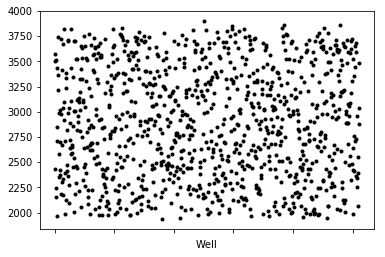

In [8]:
df['TDH'].plot(style='k.' )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004BF42E8>,
      dtype=object)

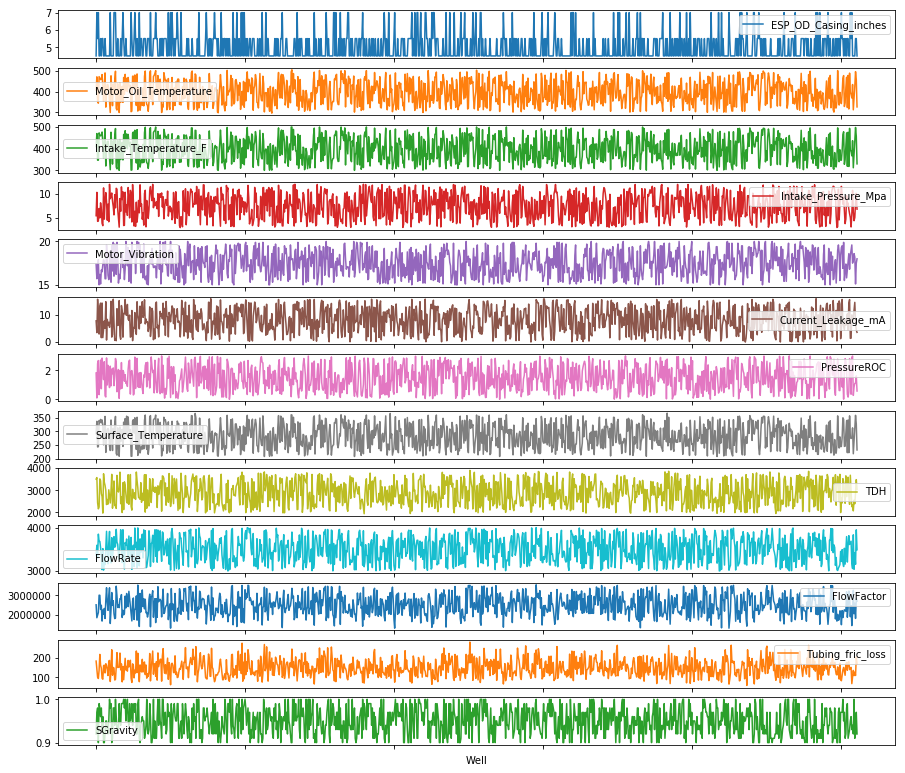

In [9]:
df.plot(subplots=True, figsize=(15,15))

In [10]:
target_col = 'TDH'
X_df = df.drop(target_col, axis=1)
y_df = df[target_col]


In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [13]:
# Train the model using the training sets
regr.fit(X_df, y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Make predictions using the testing set
y_pred = regr.predict(X_df)

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: 
 [-2.92955900e+01 -6.03330867e-01  4.81298661e-01 -1.26867212e-01
 -2.13627780e+00 -4.28726140e-01  3.85478794e+00  1.50264882e-01
  8.44887253e-02 -1.08643164e-03  1.79953573e+01 -2.71944179e+02]
Intercept: 3051.8633375888517


In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_df, y_pred))

Mean squared error: 10945.88


In [18]:
# print the R-squared value for the model
regr.score(X_df, y_df)


0.9620622731446146

In [19]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_df, y_pred))

Variance score: 0.96


In [23]:
from sklearn import metrics
import numpy as np

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_df, y_pred))
print(metrics.mean_squared_error(y_df, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_df, y_pred)))

76.72173160831107
10945.88026903768
104.62256099445129


In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_df, y_pred)


2.8065453978589923

## Is this a good fit?

![Questions](images/questions.png)

# Split the dataframe into `train` and `test`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.5)

In [ ]:
# Train the model using the training sets
regr.fit(X_train, y_train)

In [ ]:
# Make predictions using the training set, for validation
y_train_pred = regr.predict(X_train)